In [47]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [52]:
df = pd.read_csv(r'C:\\Users\\Lenovo\\Downloads\\supermarket_Sales_data.csv')

In [53]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


A    340
B    332
C    328
Name: Branch, dtype: int64

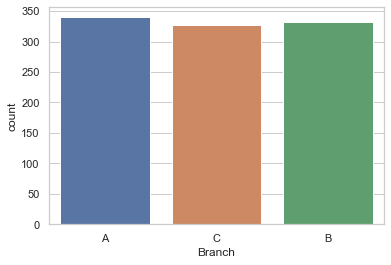

In [54]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()

There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

<AxesSubplot:xlabel='Payment', ylabel='count'>

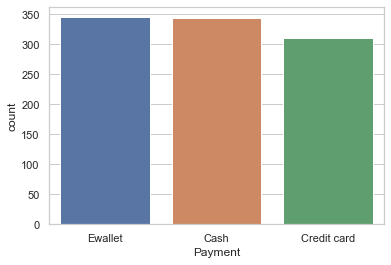

In [55]:
sns.countplot(df['Payment'])

The most popular payment method is in-fact E-wallet and not credit cards. Cash payment is also popular.

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

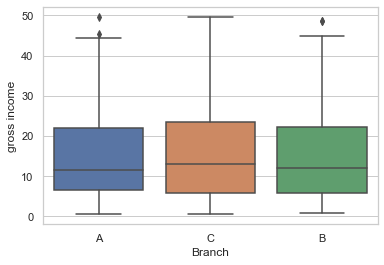

In [56]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

There is not much difference in gross income by branches at an average level. Branch C has a slightly higher income than A or B.As observed earlier,though branch A has slightly higher sales than the rest,C i.e. Naypyitaw is the most profitable branch in terms of gross income.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

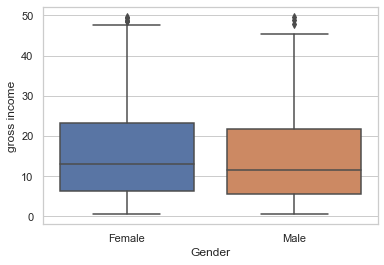

In [57]:
sns.boxplot(x=df['Gender'], y=df['gross income'])

Gross income is similar for both male and female, though female customers spend a bit higher.

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

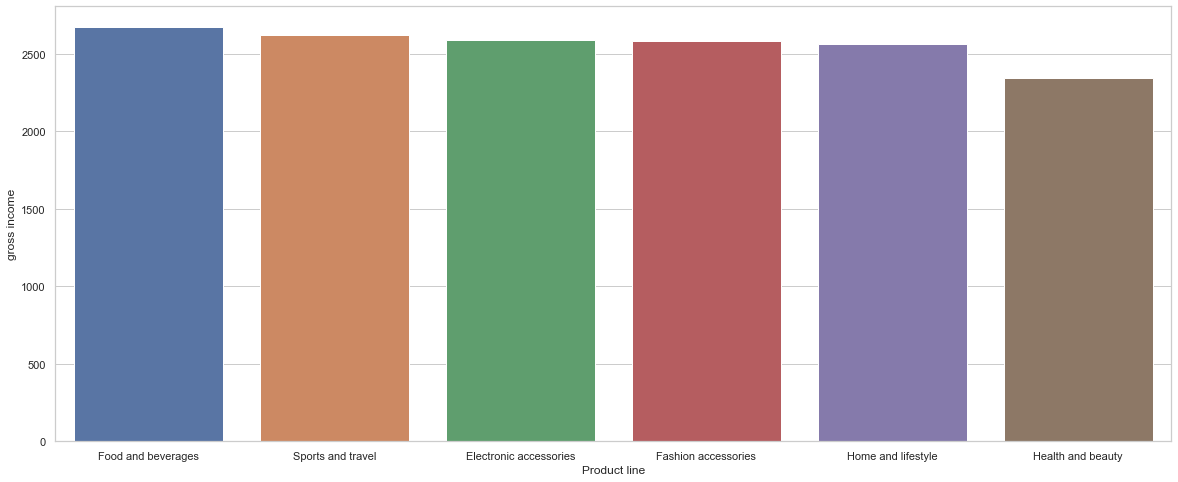

In [58]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

Gross income is highest in sports and travel.

<AxesSubplot:>

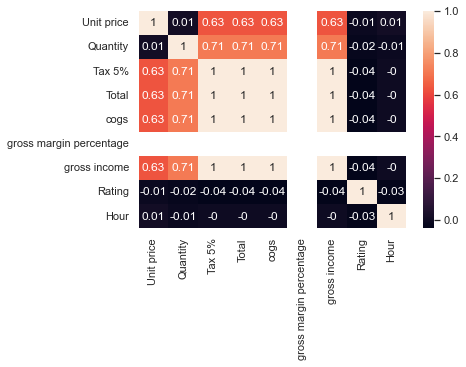

In [69]:
sns.heatmap(np.round(df.corr(),2), annot=True)    #Correlation Matrix

Unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables. Quantity and gross income has very high correlation of 70%.

We need to extract the hour from the ‘Date’ variable to find Which hour of the day is the busiest?

In [60]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

Text(0.5, 1.0, 'Product Sales per Hour')

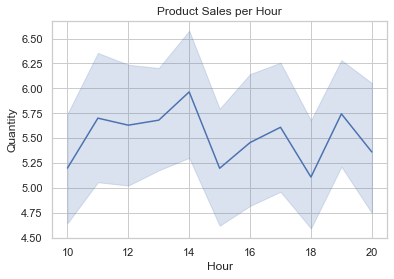

In [61]:
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

Peak is observed in the 14th hour i.e 2 pm of the day. Hence, sales is typically higher in the afternoons.

([<matplotlib.axis.XTick at 0x25294b0c1c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

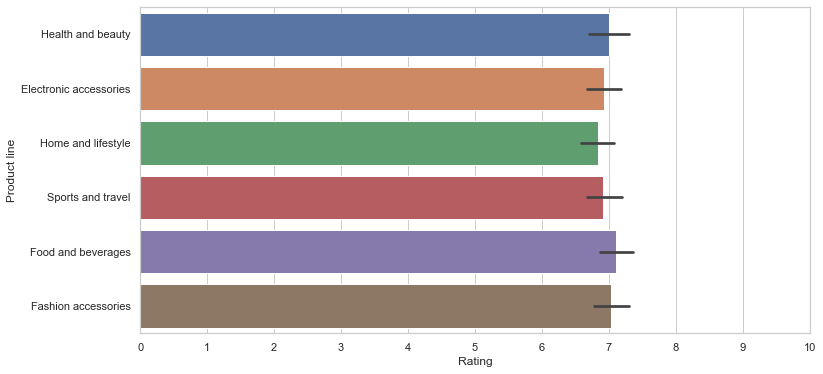

In [62]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

<AxesSubplot:xlabel='Quantity', ylabel='Product line'>

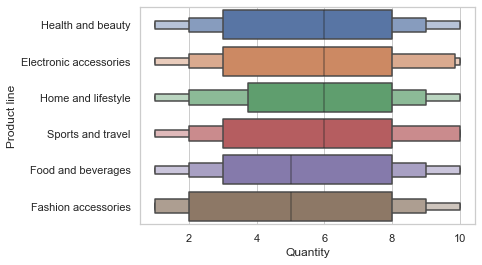

In [63]:
sns.boxenplot(y = 'Product line', x = 'Quantity', data=df )

Though the rating for ‘fashion accessories’ and ‘food and beverages’ is high but quantity purchased is low. Hence, supply for these products need to be increased.

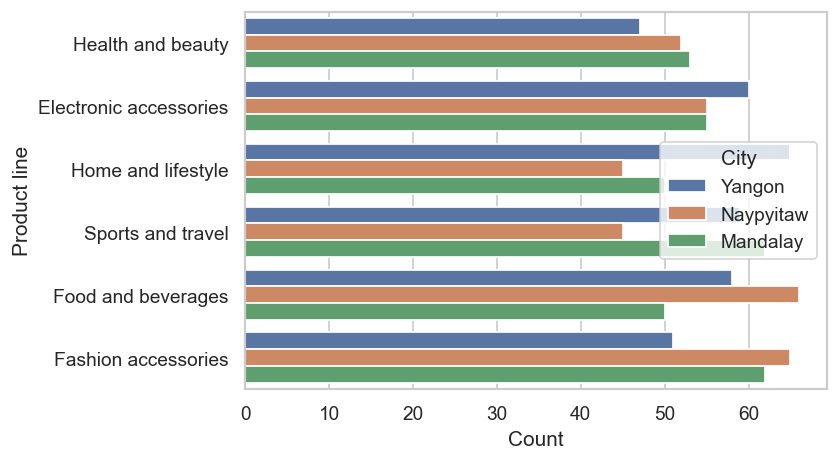

In [64]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.